# Filter comparison

NOTE: This notebook is supporting for python 2 only.

## Install pilgram

In [ ]:
!pip install pillow pilgram==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.9/802.9 kB 12.4 MB/s eta 0:00:00


## Setup

In [ ]:
!pip install seaborn

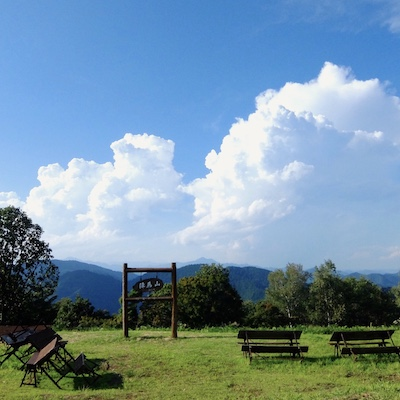

In [ ]:
from time import time
import shutil

from IPython import display
import matplotlib.pyplot as plt
from PIL import Image


N_LOOPS = 500  # @param

original_image_name = '/cnt/mtjimba.jpg'
pg_image_names = ['/content/pg_kelvin_mtjimba.jpg', '/content/pg_nashville_mtjimba.jpg', '/content/pg_toaster_mtjimba.jpg']
if_image_names = ['/content/if_Kelvin_mtjimba.jpg', '/content/if_Nashville_mtjimba.jpg', '/content/if_Toaster_mtjimba.jpg']

display.display_jpeg(display.Image(original_image_name))

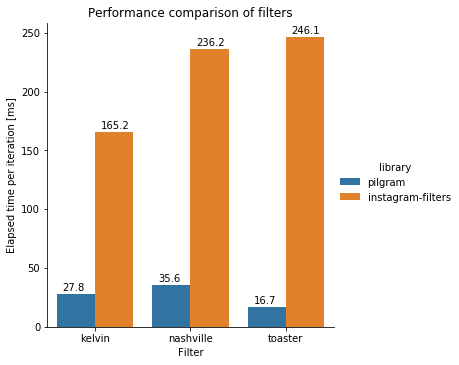

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns


elapsed_time = pg_elapsed_time.values() + if_elapsed_time.values()
elapsed_time_ms = np.array(elapsed_time) / N_LOOPS * 1000
df = pd.DataFrame(data={
  'library': ['pilgram'] * 3 + ['instagram-filters'] * 3,
  'filter': pg_filter_names * 2,
  'elapsed_time': elapsed_time_ms,
})

g = sns.catplot(x = 'filter', y = 'elapsed_time', hue='library', data = df, kind = 'bar')
g.set_axis_labels("Filter", "Elapsed time per iteration [ms]")
g.ax.set_title("Performance comparison of filters")
for p in g.ax.patches:
  x = p.get_x() + .06
  y = p.get_height() + 3
  g.ax.annotate('{:.1f}'.format(p.get_height()), (x, y))
plt.show()

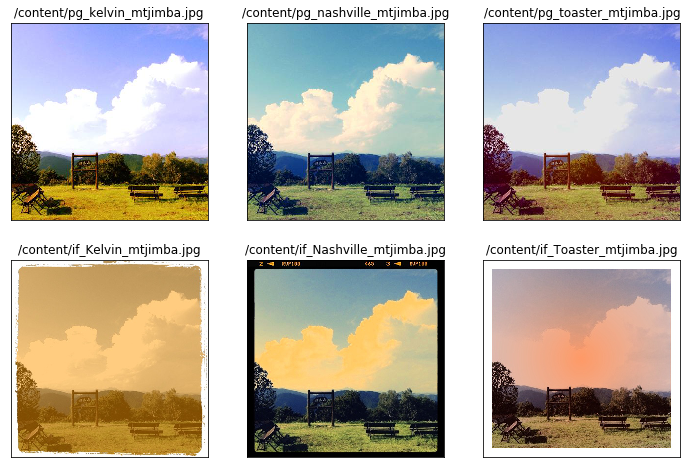

In [ ]:
image_names = pg_image_names + if_image_names
rows = 2
columns = len(pg_image_names)
fig = plt.figure(figsize=(columns * 4, rows * 4))
for i, image_name in enumerate(image_names):
  im = Image.open(image_name)
  ax = fig.add_subplot(rows, columns, i + 1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(image_name)
  ax.imshow(im)
plt.show()